In [ ]:
#Imports
import json
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge,  LogisticRegression
from sklearn.metrics import (
                            mean_absolute_error, mean_squared_error, r2_score,
                            accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
                            )
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')
print("Import loaded")

Import loaded


#### 01) Load Prerocessed Arrays

In [32]:
ARTIFACTS_DIR = Path("artifacts")
FIGURES_DIR = Path("artifacts/figures")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

#### 02) Load Preprocessed Arrays

In [33]:
X_train_reg = np.load(ARTIFACTS_DIR / 'X_train_reg.npz')['data']
X_test_reg = np.load(ARTIFACTS_DIR / 'X_test_reg.npz')['data']
y_train_reg = np.load(ARTIFACTS_DIR / 'y_train_reg.npz')['data']
y_test_reg = np.load(ARTIFACTS_DIR / 'y_test_reg.npz')['data']

X_train_cls = np.load(ARTIFACTS_DIR / 'X_train_cls.npz')['data']
X_test_cls = np.load(ARTIFACTS_DIR / 'X_test_cls.npz')['data']
y_train_cls = np.load(ARTIFACTS_DIR / 'y_train_cls.npz')['data']
y_test_cls = np.load(ARTIFACTS_DIR / 'y_test_cls.npz')['data']

print("Regression arrays loaded :")
print(f"    X_train : {X_train_reg.shape}, X_test : {X_test_reg.shape}")
print(f"    y_train : {y_train_reg.shape}, X_test : {y_test_reg.shape}")

print("\nClassification arrays loaded :")
print(f"    X_train : {X_train_cls.shape}, X_test : {X_test_cls.shape}")
print(f"    y_train : {y_train_cls.shape}, X_test : {y_test_cls.shape}")



Regression arrays loaded :
    X_train : (36735, 39), X_test : (9177, 39)
    y_train : (36735,), X_test : (9177,)

Classification arrays loaded :
    X_train : (36735, 39), X_test : (9177, 39)
    y_train : (36735,), X_test : (9177,)


#### 03) Regression Baseline

In [34]:
reg_models = {
                'LR' : LinearRegression(),
                'Ridge_alpha1' : Ridge(alpha=1, random_state=RANDOM_STATE),
                'Ridge_alpha10' : Ridge(alpha=10, random_state=RANDOM_STATE),
                'Ridge_alpha100' : Ridge(alpha=100, random_state=RANDOM_STATE)
                }

reg_results = []

for name, model in reg_models.items():
    print(f"\n Training {name} model ...")
    model.fit(X_train_reg,  y_train_reg)

    # Predict
    y_pred_train = model.predict(X_train_reg)
    y_pred_test = model.predict(X_test_reg)

    train_mae = mean_absolute_error(y_train_reg, y_pred_train)
    test_mae = mean_absolute_error(y_test_reg, y_pred_test)

    train_rmae = np.sqrt(mean_absolute_error(y_train_reg, y_pred_train))
    test_rmae = np.sqrt(mean_absolute_error(y_test_reg, y_pred_test))

    train_r2 = r2_score(y_train_reg, y_pred_train)
    test_r2 = r2_score(y_test_reg, y_pred_test)

    reg_results.append({
                        'Model' : name,
                        'Train MAE' : train_mae,
                        'Train RMSE' : train_r2,
                        'Train R2' : train_r2,
                        'Test MAE' : test_mae,
                        'Test RMSE' : test_mae,
                        'Test R2' : test_r2
                    })
    print(f" Test MAE : ${test_mae:.2f} | Test RMSE : $ {test_mae:.2f} | Test R2 : ${test_r2:.2f}")

# Creating Results DataFrame
df_reg_results = pd.DataFrame(reg_results)
print("\n Regression Baseline Results :")
print(df_reg_results.to_string(index=False))

# Save Results
metrics_reg = df_reg_results.to_dict(orient='records')
with open(ARTIFACTS_DIR / 'metrics_baseline_regression.json', 'w') as f:
    json.dump(metrics_reg, f, indent=2)



 Training LR model ...
 Test MAE : $36.28 | Test RMSE : $ 36.28 | Test R2 : $0.49

 Training Ridge_alpha1 model ...
 Test MAE : $36.28 | Test RMSE : $ 36.28 | Test R2 : $0.49

 Training Ridge_alpha10 model ...
 Test MAE : $36.28 | Test RMSE : $ 36.28 | Test R2 : $0.49

 Training Ridge_alpha100 model ...
 Test MAE : $36.35 | Test RMSE : $ 36.35 | Test R2 : $0.49

 Regression Baseline Results :
         Model  Train MAE  Train RMSE  Train R2  Test MAE  Test RMSE  Test R2
            LR  35.890291    0.496197  0.496197 36.277615  36.277615 0.491279
  Ridge_alpha1  35.890417    0.496197  0.496197 36.278062  36.278062 0.491270
 Ridge_alpha10  35.891928    0.496187  0.496187 36.282839  36.282839 0.491184
Ridge_alpha100  35.930345    0.495557  0.495557 36.347332  36.347332 0.490045


#### 04) Classification Baseline

In [37]:
cls_models = {
            'LogR' : LogisticRegression(
                                        multi_class='multinomial',
                                        max_iter = 200,
                                        random_state=RANDOM_STATE
                                        ),
            'DT' : DecisionTreeClassifier(
                                        max_depth=6,
                                        random_state=RANDOM_STATE
                                        )
            }

cls_results = []


for name, model in cls_models.items():
    print(f"\n Training {name} model ...")
    model.fit(X_train_cls, y_train_cls)

    # Predict
    y_pred_train = model.predict(X_train_cls)
    y_pred_test = model.predict(X_test_cls)

    train_acc = accuracy_score(y_train_cls, y_pred_train)
    test_acc = accuracy_score(y_test_cls, y_pred_test)

    train_precision = precision_score(y_train_cls, y_pred_train, average='weighted')
    test_precision = precision_score(y_test_cls, y_pred_test, average='weighted')

    train_recall =recall_score(y_train_cls, y_pred_train, average='weighted')
    test_recall = recall_score(y_test_cls, y_pred_test, average='weighted')

    train_f1 = f1_score(y_train_cls, y_pred_train, average='weighted')
    test_f1 = f1_score(y_test_cls, y_pred_test, average='weighted')


    cls_results.append({
                        'Model' : name,
                        'Train Accuracy' : train_acc,
                        'Train Precision' : train_precision,
                        'Train Recall' : train_recall,
                        'Train F1 Score' : train_f1,
                        'Test Accuracy' : test_acc,
                        'Test Precision' : test_precision,
                        'Test Recall' : test_recall,
                        'Test F1 Score' : test_f1,
                    })
    print(f" Test Accuracy : {test_acc:.2f} | Test Precision : {test_precision:.2f} | Test Recall : {test_recall:.2f} | Test F1 Score : {test_f1:.2f}")

# Creating Results DataFrame
df_cls_results = pd.DataFrame(cls_results)
print("\n Classification Baseline Results :")
print(df_cls_results.to_string(index=False))

# Save Results
metrics_cls = df_cls_results.to_dict(orient='records')
with open(ARTIFACTS_DIR / 'metrics_baseline_classification.json', 'w') as f:
    json.dump(metrics_cls, f, indent=2)


 Training LogR model ...
 Test Accuracy : 0.66 | Test Precision : 0.65 | Test Recall : 0.66 | Test F1 Score : 0.65

 Training DT model ...
 Test Accuracy : 0.67 | Test Precision : 0.67 | Test Recall : 0.67 | Test F1 Score : 0.67

 Classification Baseline Results :
Model  Train Accuracy  Train Precision  Train Recall  Train F1 Score  Test Accuracy  Test Precision  Test Recall  Test F1 Score
 LogR        0.666122         0.651191      0.666122        0.651986       0.664705        0.649868     0.664705       0.650992
   DT        0.680931         0.674141      0.680931        0.674923       0.672769        0.666896     0.672769       0.667813


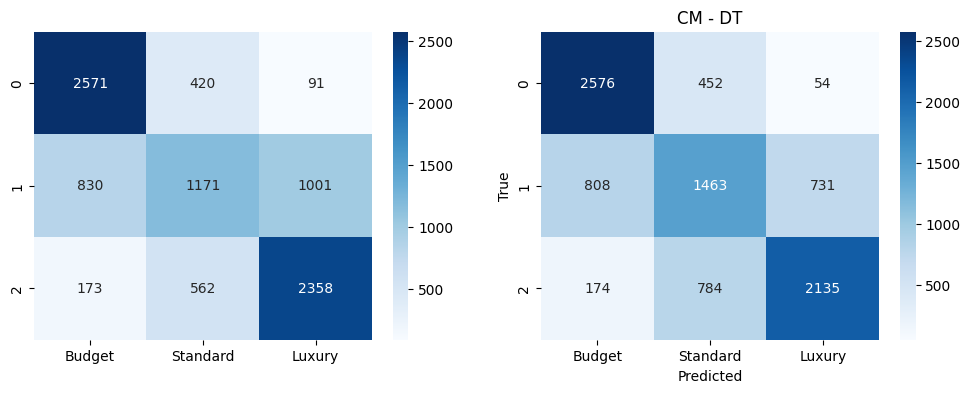

In [43]:
CLASS_LABELS = ['Budget', 'Standard', 'Luxury']
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for idx, (name, model) in enumerate(cls_models.items()):
    y_pred_test = model.predict(X_test_cls)
 
    cm = confusion_matrix(y_test_cls, y_pred_test)

    sns.heatmap(
                cm, 
                annot=True, fmt='d', cmap='Blues',
                xticklabels=CLASS_LABELS, ax=axes[idx]
                )

axes[idx].set_title(f"CM - {name}")
axes[idx].set_ylabel("True")
axes[idx].set_xlabel("Predicted")

plt.tight_layout
plt.savefig(
            FIGURES_DIR / 'baseline_classification_cm.png',
            dpi=150,bbox_inches='tight'
            )